In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,TensorDataset

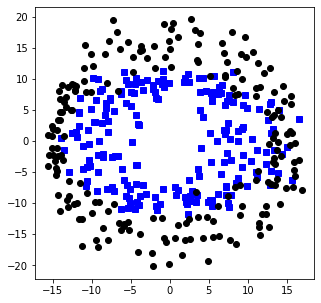

In [5]:
nPerClust = 200

th = np.linspace(0,4*np.pi,nPerClust)
r1 = 10
r2 = 15

a = [r1*np.cos(th) + np.random.randn(nPerClust)*3,
    r1*np.sin(th) + np.random.randn(nPerClust)]
b = [r2*np.cos(th) + np.random.randn(nPerClust),
    r2*np.sin(th) + np.random.randn(nPerClust)*3]

labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

data_np = np.hstack((a,b)).T

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.show();

In [6]:
train_data,test_data,train_labels,test_labels = train_test_split(data,labels,test_size=.2)

train_data = TensorDataset(train_data,train_labels)
test_data = TensorDataset(test_data,test_labels)

In [9]:
batchsize = 16
train_loader =  DataLoader(train_data,batch_size=batchsize,shuffle=True)
test_loader = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

In [20]:
class theModelClass(nn.Module):
    def __init__(self,dropoutRate):
        super().__init__()
        
        self.input = nn.Linear(2,128)
        self.hidden = nn.Linear(128,128)
        self.output = nn.Linear(128,1)
        
        self.dr = dropoutRate

    
    def forward(self,x):
        
        x = F.relu(self.input(x))
        
        x = F.dropout(x,p=self.dr,training=self.training)
        
        x = F.relu(self.hidden(x))
        
        x = F.dropout(x,p=self.dr,training=self.training)
        
        x = self.output(x)
        
        return x

In [21]:
tempnet = theModelClass(.25)
tempdata = torch.randn((10,2))
yHat = tempnet(tempdata)
yHat

tensor([[0.2676],
        [0.4494],
        [0.1108],
        [0.1437],
        [0.2822],
        [0.2782],
        [0.4819],
        [0.4463],
        [0.2344],
        [0.4715]], grad_fn=<AddmmBackward0>)